# Part 1

Peer graded assignment,part 1 :: reading Data from a webpage 

In [2]:
import pandas as pd

In [3]:
#reading data from HTML
toronto_html=pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

In [4]:
#assigning the table to df
df_toronto=toronto_html[0]

#changing column names
df_toronto.columns= "PostalCode Borough Neighborhood".split()
df_toronto.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [5]:
#removing rows with Borough =Not assigned
df_toronto=df_toronto[df_toronto['Borough']!='Not assigned']
df_toronto.reset_index(drop=True,inplace=True)

In [6]:
#replacing / with , in Neighborhood
df_toronto['Neighborhood']=df_toronto['Neighborhood'].str.replace(' / ',', ')

#showing correctly now
df_toronto[df_toronto['PostalCode']=='M5A']

F:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PostalCode,Borough,Neighborhood
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [7]:
df_toronto.shape

(103, 3)

# Part 2

Peer graded assignment, part 2 :: assign Lat and long 

In [8]:
import geocoder

#### geocoder did not work

In [9]:
#reading data from csv
df_lat_lng=pd.read_csv("http://cocl.us/Geospatial_data")

In [10]:
df_lat_lng.columns=['PostalCode']+list(df_lat_lng.columns.values[1:])

In [11]:
#Merging two df
df_toronto=df_toronto.merge(df_lat_lng,how = 'inner',on='PostalCode')

In [12]:
df_toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


# Part 3

Peer graded assignment , Part 3 :: using clustering on boroughs that contain the word Toronto

In [17]:
#getting all rows where Borough has the word 'toronto'
borough_toronto= df_toronto[ df_toronto['Borough'].str.find('Toronto')!=-1].reset_index(drop=True)

In [18]:
borough_toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [16]:
import folium

In [28]:
# create map of toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.670360, -79.360636], zoom_start=12)

# add markers to map
for lat, lng, label in zip(borough_toronto['Latitude'], borough_toronto['Longitude'], borough_toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [29]:
import json
import requests
from pandas.io.json import json_normalize


In [30]:
CLIENT_ID = 'KKVWFG3JVIHFHPHBFHUTBX115IDPEEE4JA0ZDMFZPHB5PQ3X' # your Foursquare ID
CLIENT_SECRET = 'XCVB3R3U0KPWB454HAFOUD5CPKF5HO1PCPCW40SNUISIGI2Q' # your Foursquare Secret
VERSION = '20200420' # Foursquare API version

Defining function to get required data from foursquare

In [36]:
def getNearbyVenues(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            500, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
#Getting all the required data 
toronto_venues = getNearbyVenues(names=borough_toronto['Neighborhood'],
                                   latitudes=borough_toronto['Latitude'],
                                   longitudes=borough_toronto['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town,

In [61]:
toronto_venues.shape

(1609, 7)

Creating onehot table using dummies

In [76]:
toronto_onehot=pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood_name'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
toronto_onehot = toronto_onehot[['Neighborhood_name'] + list(toronto_onehot.columns[:-1])]

toronto_onehot.head()

,Neighborhood_name,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
toronto_grouped = toronto_onehot.groupby('Neighborhood_name').mean().reset_index()
toronto_grouped.head()

,Neighborhood_name,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.018182,...,0.0,0.0,0.0,0.0,0.018182,0.0,0.0,0.0,0.0,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,Business reply mail Processing CentrE,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.058824
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.066667,0.066667,0.066667,0.133333,0.2,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.016129,0.0,0.0,0.0,0.0,0.016129


In [78]:
toronto_grouped.shape


(39, 232)

In [81]:
#function to get most popular destination
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [83]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood_name'] = toronto_grouped['Neighborhood_name']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Beer Bar,Bakery,Seafood Restaurant,Farmers Market,Cheese Shop,Italian Restaurant,Café
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Bakery,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant,Burrito Place
2,Business reply mail Processing CentrE,Light Rail Station,Yoga Studio,Spa,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Comic Shop,Pizza Place,Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Harbor / Marina,Sculpture Garden,Airport Food Court,Airport Gate,Bar,Boat or Ferry,Boutique,Coffee Shop
4,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Ice Cream Shop,Japanese Restaurant,Salad Place,Burger Joint,Bubble Tea Shop,Fried Chicken Joint


In [90]:
from sklearn.cluster import KMeans
import matplotlib as mlt

In [109]:
#using for loop to get the best K
cluster_effi=[]
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood_name', 1)
# set number of clusters
for kclusters in (range(2,7)):
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
    cluster_effi.append([kclusters,kmeans.inertia_])

##### plotting the data to choose correct K using Elbow method and K =5 is best

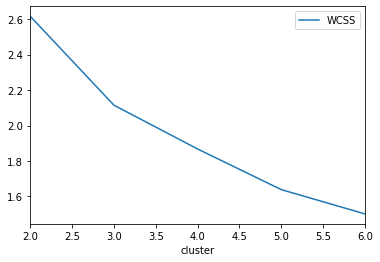

In [111]:
pd.DataFrame(cluster_effi,columns=['cluster','WCSS']).plot(x='cluster',y='WCSS')

In [112]:
#creating Kmeans using k=5
kmeans = KMeans(n_clusters=5, random_state=0).fit(toronto_grouped_clustering)
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


,Cluster Labels,Neighborhood_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Beer Bar,Bakery,Seafood Restaurant,Farmers Market,Cheese Shop,Italian Restaurant,Café
1,0,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Bakery,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant,Burrito Place
2,0,Business reply mail Processing CentrE,Light Rail Station,Yoga Studio,Spa,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Comic Shop,Pizza Place,Restaurant
3,0,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Harbor / Marina,Sculpture Garden,Airport Food Court,Airport Gate,Bar,Boat or Ferry,Boutique,Coffee Shop
4,0,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Ice Cream Shop,Japanese Restaurant,Salad Place,Burger Joint,Bubble Tea Shop,Fried Chicken Joint


In [114]:
neighborhoods_venues_sorted.rename(columns={'Neighborhood_name':'Neighborhood'},inplace=True)
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Beer Bar,Bakery,Seafood Restaurant,Farmers Market,Cheese Shop,Italian Restaurant,Café
1,0,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Bakery,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant,Burrito Place
2,0,Business reply mail Processing CentrE,Light Rail Station,Yoga Studio,Spa,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Comic Shop,Pizza Place,Restaurant
3,0,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Harbor / Marina,Sculpture Garden,Airport Food Court,Airport Gate,Bar,Boat or Ferry,Boutique,Coffee Shop
4,0,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Ice Cream Shop,Japanese Restaurant,Salad Place,Burger Joint,Bubble Tea Shop,Fried Chicken Joint


In [119]:
final_df=borough_toronto
final_df = final_df.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

final_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Theater,Café,Restaurant,Yoga Studio,Event Space
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Diner,Yoga Studio,Burger Joint,Fried Chicken Joint,Beer Bar,Spa,Italian Restaurant,Juice Bar
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Café,Japanese Restaurant,Cosmetics Shop,Restaurant,Middle Eastern Restaurant,Bubble Tea Shop,Thai Restaurant,Fast Food Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Hotel,Cocktail Bar,Gastropub,Italian Restaurant,American Restaurant,Gym,Restaurant,Farmers Market
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,2,Health Food Store,Pub,Trail,Neighborhood,Yoga Studio,Donut Shop,Distribution Center,Dog Run,Doner Restaurant,Eastern European Restaurant


In [117]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [120]:
# create map
map_clusters = folium.Map(location=[43.670360, -79.360636], zoom_start=12)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_df['Latitude'], final_df['Longitude'], final_df['Neighborhood'], final_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters